1.. Veri okuma

In [1]:
import pandas as pd

# Verileri yükle
train_df = pd.read_csv("dataset/train_balanced.csv")
test_df = pd.read_csv("dataset/test_scaled.csv")

# Özellik ve etiket ayırma
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]

X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

print("Eğitim şekli:", X_train.shape)
print("Test şekli:", X_test.shape)

Eğitim şekli: (398040, 30)
Test şekli: (85443, 30)


2. ANN modeli oluşturma

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ANN model mimarisi
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary sınıflama için sigmoid

# Derleme
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-24 12:14:07.062730: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-03-24 12:14:07.062758: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-03-24 12:14:07.062761: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-03-24 12:14:07.062794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-24 12:14:07.062803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow 

3. Model Eğitimi

In [3]:
history = model.fit(X_train, y_train, epochs=10, batch_size=2048, 
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


2025-03-24 12:14:11.307233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7797 - loss: 0.4303 - val_accuracy: 0.9737 - val_loss: 0.1969
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9208 - loss: 0.2046 - val_accuracy: 0.9798 - val_loss: 0.1223
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9398 - loss: 0.1611 - val_accuracy: 0.9815 - val_loss: 0.1126
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9472 - loss: 0.1441 - val_accuracy: 0.9804 - val_loss: 0.1082
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9483 - loss: 0.1431 - val_accuracy: 0.9795 - val_loss: 0.1041
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9490 - loss: 0.1429 - val_accuracy: 0.9821 - val_loss: 0.0945
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9479 - loss: 0.1455 - val_accuracy: 0.9813 - val_loss: 0.0998
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9491 - loss: 0.1447 - val_accuracy: 0.9824 - val

4. ANN modeli eğitimi ve değerlendirme

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 976us/step


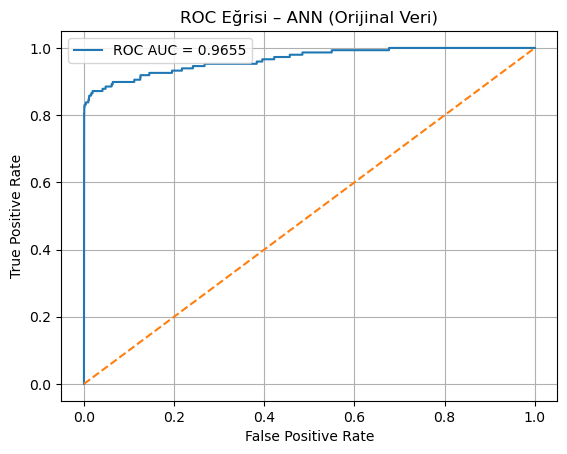

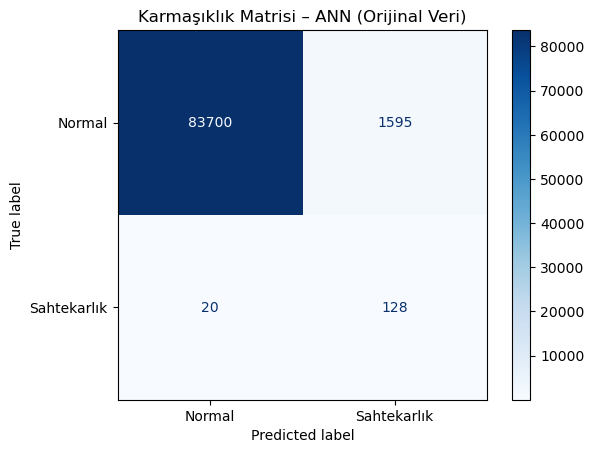

Doğruluk (Accuracy):     0.9811
Kesinlik (Precision):    0.0743
Duyarlılık (Recall):     0.8649
Özgüllük (Specificity):  0.9813
F1 Skoru:                0.1368
ROC AUC Skoru:           0.9655


In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tahminler
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – ANN (Orijinal Veri)")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Sahtekarlık"]).plot(cmap="Blues")
plt.title("Karmaşıklık Matrisi – ANN (Orijinal Veri)")
plt.show()

# Metrikler
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc:.4f}")

## ANN (Yapay Sinir Ağı) Modeli – Orijinal Özniteliklerle Performans Değerlendirmesi

Yapay Sinir Ağı modeli, orijinal boyuttaki öznitelikler ile eğitilmiştir. Modelin başarı düzeyi aşağıdaki tabloda özetlenmiştir:

| Metrik              | Değer     |
|---------------------|-----------|
| Doğruluk (Accuracy) | 0.9811    |
| Kesinlik (Precision)| 0.0743    |
| Duyarlılık (Recall) | 0.8649    |
| Özgüllük (Specificity) | 0.9813 |
| F1 Skoru            | 0.1368    |
| ROC AUC Skoru       | 0.9655    |

### Yorum:
- ANN modeli, önceki Naive Bayes modellerine kıyasla daha **dengeleyici** sonuçlar vermiştir.
- **Recall** değeri %86 ile yüksek olup, sahtekarlık işlemlerin çoğunu doğru şekilde tespit edebilmiştir.
- **Precision** değeri Naive Bayes'e kıyasla daha yüksek olsa da hâlâ düşük seviyededir. Bu durum, hâlâ yanlış pozitiflerin mevcut olduğunu göstermektedir.
- **F1 Skoru**, hem recall hem precision dengesine dayandığı için ANN modelinde en yüksek değere ulaşmıştır.
- **ROC AUC** değeri yüksek çıktığı için, modelin sınıflar arasında güçlü bir ayrım yapabildiği anlaşılmaktadır.

Bu sonuçlar, ANN'nin sahtekarlık tespitinde daha etkili bir seçenek olduğunu göstermektedir.